# Jsteg/F3/F4

## Import & def funcs

In [41]:
import DCT
import numpy as np
from F4 import F4
from F3 import F3
from Jsteg import Jsteg
from plot import plotIt
import matplotlib.pyplot as plt

readData = False

def plotdct(obj,title):
    b = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, -
            1: 0, -2: 0, -3: 0, -4: 0, -5: 0, -6: 0, -7: 0, -8: 0}
    for i in obj:
        if i in b:
            b[i]+=1
    print(b)
    plotIt(b, title)

def plotDCT(obj, title):
    img = DCT.indct(obj.get_sequence_after_dct(), "tmp.png")

    f, arr = plt.subplots(1, 2)
    arr[0].imshow(DCT.img, cmap='gray')
    arr[0].set_title('origin')
    arr[1].imshow(img, cmap='gray')
    arr[1].set_title(title)
    plt.show()

    plotdct(obj.get_sequence_after_dct(), title)


def tobits(s):
    result = []
    for c in s:
        bits = bin(ord(c))[2:]
        bits = '00000000'[len(bits):] + bits
        result.extend([int(b) for b in bits])
    return result

def frombits(bits):
    chars = []
    for b in range(int(len(bits) / 8)):
        b = int(b)
        byte = bits[b*8:(b+1)*8]
        chars.append(chr(int(''.join([str(bit) for bit in byte]), 2)))
    return ''.join(chars)


## Define classes, load picture

Load>> 可嵌入 216947 bits
Load>> 大约可嵌入 231812 bits
Load>> 最少可嵌入 216947 bits

Load>> 大约可嵌入 231812 bits
Load>> 最少可嵌入 216947 bits

{0: 15467, 1: 14868, 2: 13661, 3: 11951, 4: 10401, 5: 8793, 6: 7562, 7: 6268, 8: 5519, -1: 14862, -2: 13763, -3: 11966, -4: 10353, -5: 8738, -6: 7426, -7: 6317, -8: 5416}


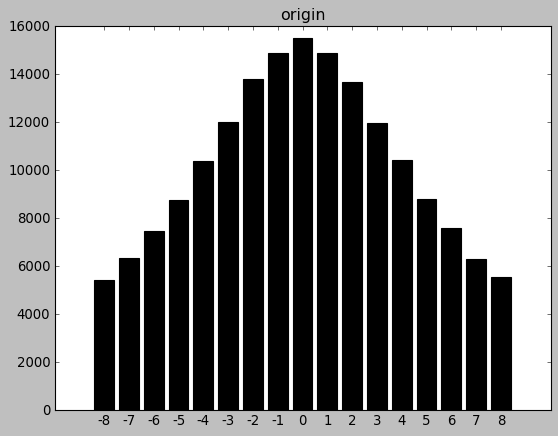

In [37]:
jsteg=Jsteg()
f3=F3()
f4=F4()
# 写
sequence_after_dct=DCT.load('a.jpeg')
jsteg.set_sequence_after_dct(sequence_after_dct)
f3.set_sequence_after_dct(sequence_after_dct)
f4.set_sequence_after_dct(sequence_after_dct)
a={0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,-1:0,-2:0,-3:0,-4:0,-5:0,-6:0,-7:0,-8:0}
for i in sequence_after_dct:
    if i in a:
        a[i]+=1
print(a)
plotIt(a,"origin")
# info1=[0 for i in np.random.rand(200000)]
if readData:
    info1 = tobits('U201811662'*100)
else:
    info1 = [int(i+0.5) for i in np.random.rand(200000)]


## Jsteg

Jsteg begin writing!
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


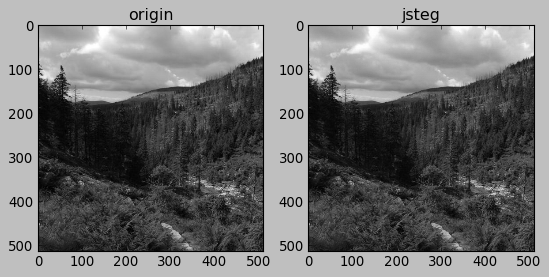

{0: 15467, 1: 14868, 2: 13000, 3: 12612, 4: 9841, 5: 9353, 6: 6922, 7: 6908, 8: 5262, -1: 14862, -2: 13105, -3: 12624, -4: 9797, -5: 9294, -6: 6936, -7: 6807, -8: 5181}


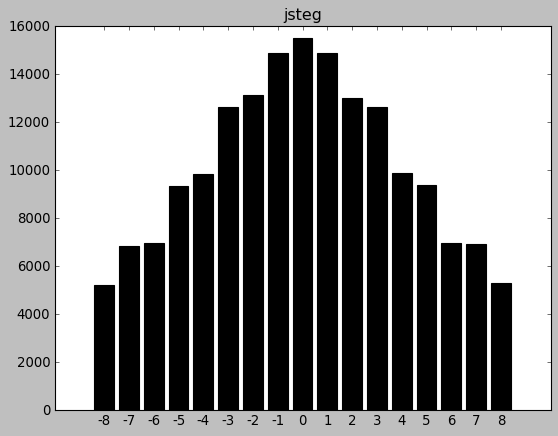

In [38]:
print("Jsteg begin writing!")
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
jsteg.write(info1)


info2 = jsteg.read()
plotDCT(jsteg, "jsteg")
if readData:
    print("读取结果：",frombits(info2))



## F3

F3steg begin writing!
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


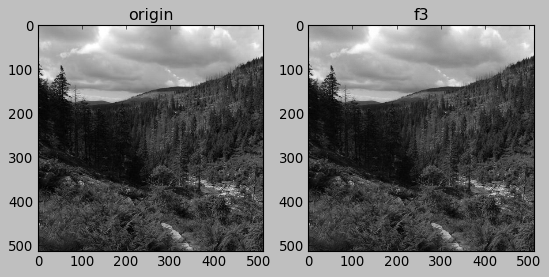

{0: 27721, 1: 13333, 2: 13768, 3: 10889, 4: 10405, 5: 7867, 6: 7346, 7: 5949, 8: 5438, -1: 13275, -2: 14086, -3: 10863, -4: 10266, -5: 7872, -6: 7324, -7: 5863, -8: 5386}


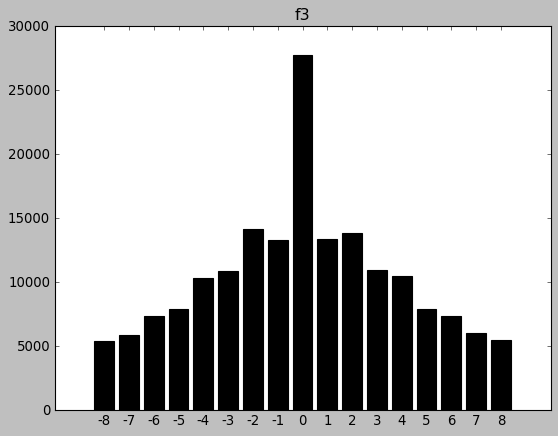

In [39]:
print("F3steg begin writing!")
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
f3.write(info1)
DCT.indct(f3.get_sequence_after_dct(), "f3_out.png")
info3 = f3.read()
plotDCT(f3, "f3")
if readData:
    print("读取结果：",frombits(info3))


## F4

F4steg begin writing!
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


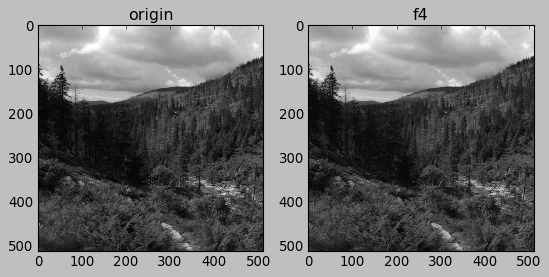

{0: 38523, 1: 13843, 2: 12394, 3: 10842, 4: 9300, 5: 7700, 6: 6826, 7: 5728, 8: 4990, -1: 13934, -2: 12570, -3: 10787, -4: 9215, -5: 7859, -6: 6511, -7: 5804, -8: 4824}


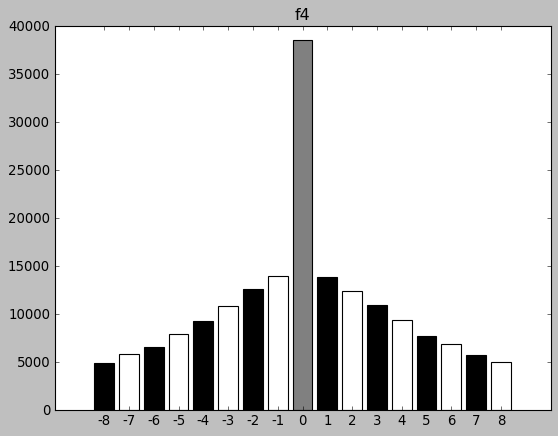

In [40]:
print("F4steg begin writing!")
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
f4.write(info1)
DCT.indct(f4.get_sequence_after_dct(), "f4_out.png")
if readData:
    info4 = f4.read()

plotDCT(f4, "f4")
if readData:
    print("读取结果：",frombits(info4))
